In [151]:
path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/repositories/pytorch-CycleGAN-and-pix2pix_adjusted/dscrc0n_exp12/dscrc0n_exp12/test_latest/images"
#path_results = "/n/pfister_lab2/Lab/scajas/pytorch-CycleGAN-and-pix2pix_exp3L1/Exp3L1/Exp3L1/test_latest/images"
#path_results = "/n/pfister_lab2/Lab/scajas/pytorch-CycleGAN-and-pix2pix_dev/exp3_83_epochs/exp3_1/test_latest/images"
#path_results = "/n/pfister_lab2/Lab/scajas/pytorch-CycleGAN-and-pix2pix_dev/exp_405_epochs/exp3_1/test_latest/images"
#path_results = "/n/pfister_lab2/Lab/scajas/pytorch-CycleGAN-and-pix2pix_master/exp4_channels/exp4_channels/test_latest/images"
#path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/repositories/pytorch-CycleGAN-and-pix2pix/dscrc0n_exp14/dscrc0n_exp14/test_latest/images"
#path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/repositories/pytorch-CycleGAN-and-pix2pix_adjusted/dscrc0n_exp14/dscrc0n_exp14/test_latest/images"
#path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/repositories/pytorch-CycleGAN-and-pix2pix/dscrc0n_exp15/dscrc0n_exp15/test_latest/images"
#path_results = "/net/coxfs01/srv/export/coxfs01/pfister_lab2/share_root/Lab/scajas/repositories/pytorch-CycleGAN-and-pix2pix/dscrc0n3ch/dscrc0n3ch/test_latest/images"

### Visualize data

In [152]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io

import os.path

%matplotlib inline

def plot_imgs(imgs, titles):
    """
    Generate visualization of list of arrays
    :param imgs: list of arrays, each numpy array is an image of size (width, height)
    :param titles: list of titles [string]
    """
    # create figure
    fig = plt.figure(figsize=(70, 70))
    # loop over images
    for i in range(len(imgs)):
        fig.add_subplot(4, 4, i + 1)
        plt.imshow(imgs[i])
        plt.title(str(titles[i]))
        plt.axis("off")
        
def return_list_of_matches(key, elements):
    """
    uses the key (identifier for each generated image) and 
    returns on a list all the elemets on the path that contain that key.
    In general should be Real A, Fake B, Real B
    """
    lista_elementos = []
    for i in elements:
        if key in i:
            lista_elementos.append(i)
    return lista_elementos### Watch results

CRC01-rs_5152-cs_23296_real_A.tiff
Aligned images:  ['CRC01-rs_5152-cs_23296_real_A.tiff', 'CRC01-rs_5152-cs_23296_fake_B.tiff', 'CRC01-rs_5152-cs_23296_real_B.tiff']
(256, 256, 3) (256, 256, 19) (256, 256, 19)
Range for HE]-> [(0, 255)]
Range for IF]-> [(0, 255)]
Range for Generated IF]-> [(0, 255)]
Range for Generated IF (stack)]-> [(0, 255)]
Range for Generated IF Channel 0]-> [(0, 239)]
Range for Generated IF Channel 3]-> [(0, 243)]
Range for Generated IF Channel 17]-> [(0, 254)]
Range for Real_IF  Channel 0]-> [(27, 230)]
Range for Real_IF  Channel 3]-> [(27, 232)]
Range for Real_IF  Channel 17]-> [(5, 255)]


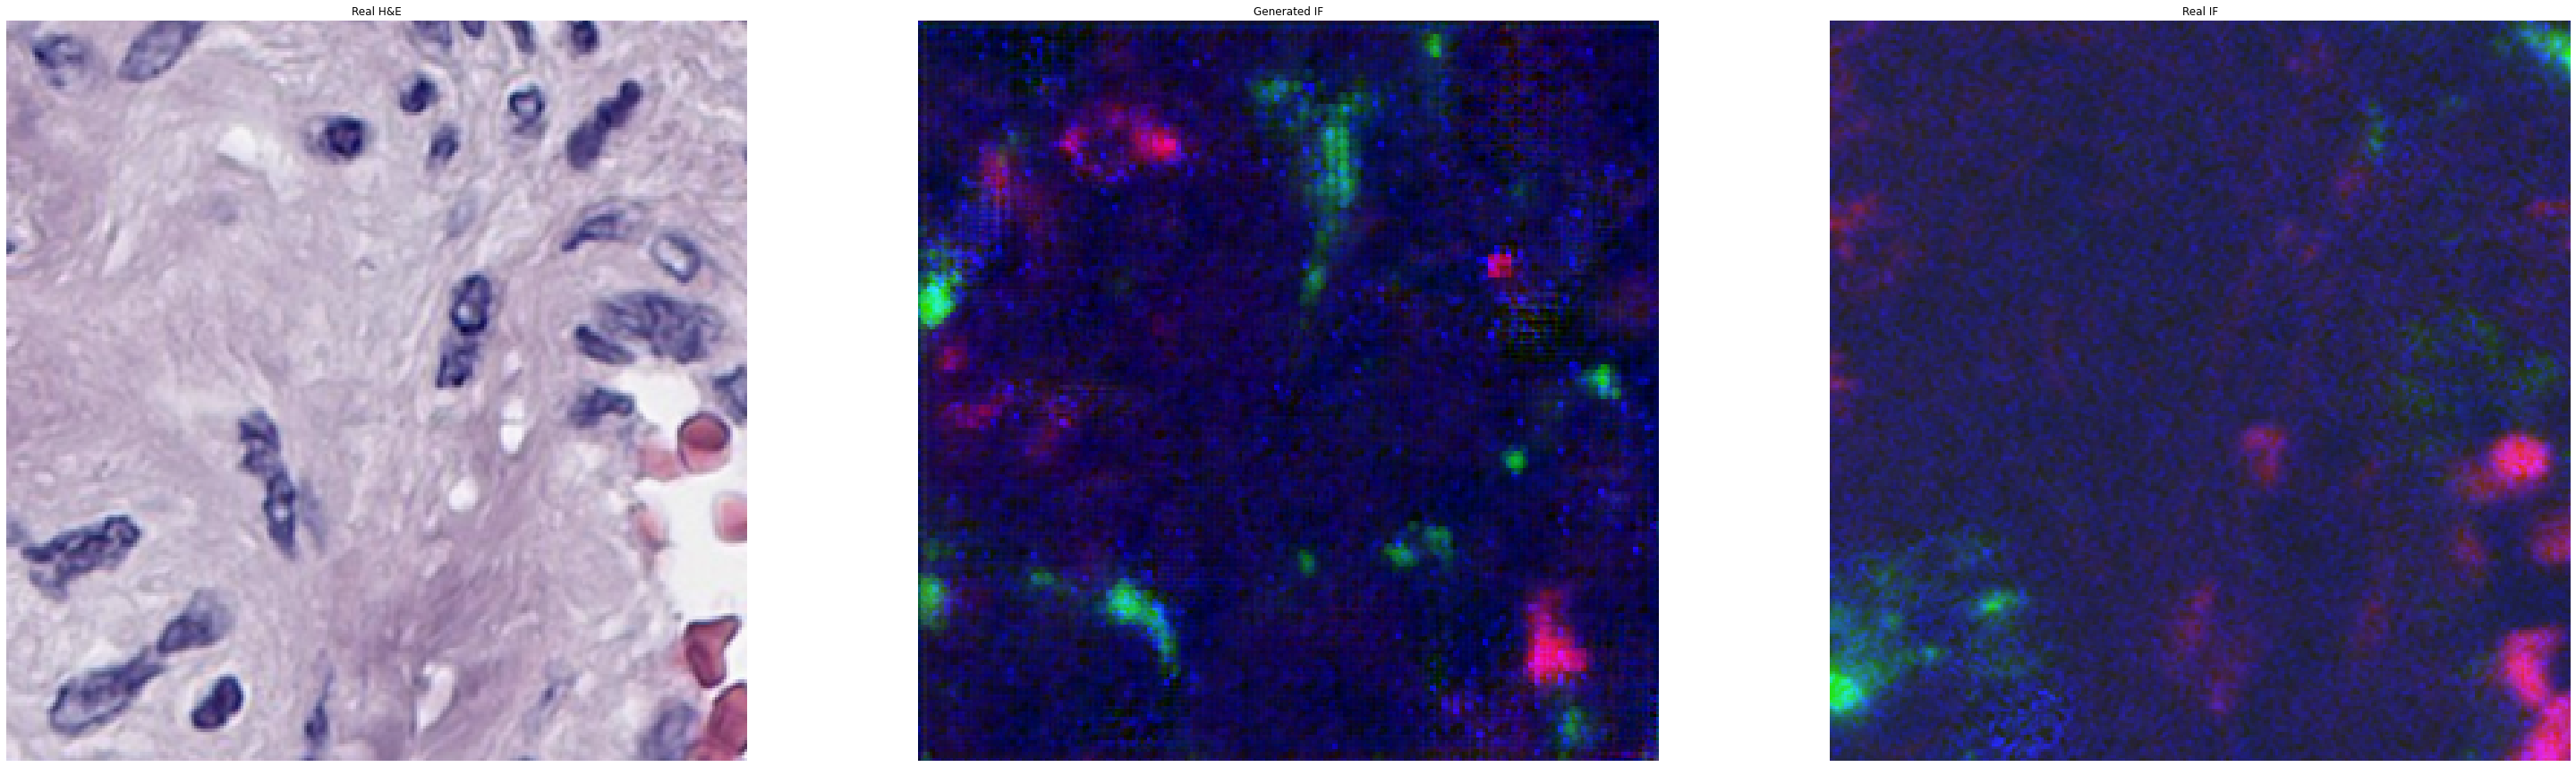

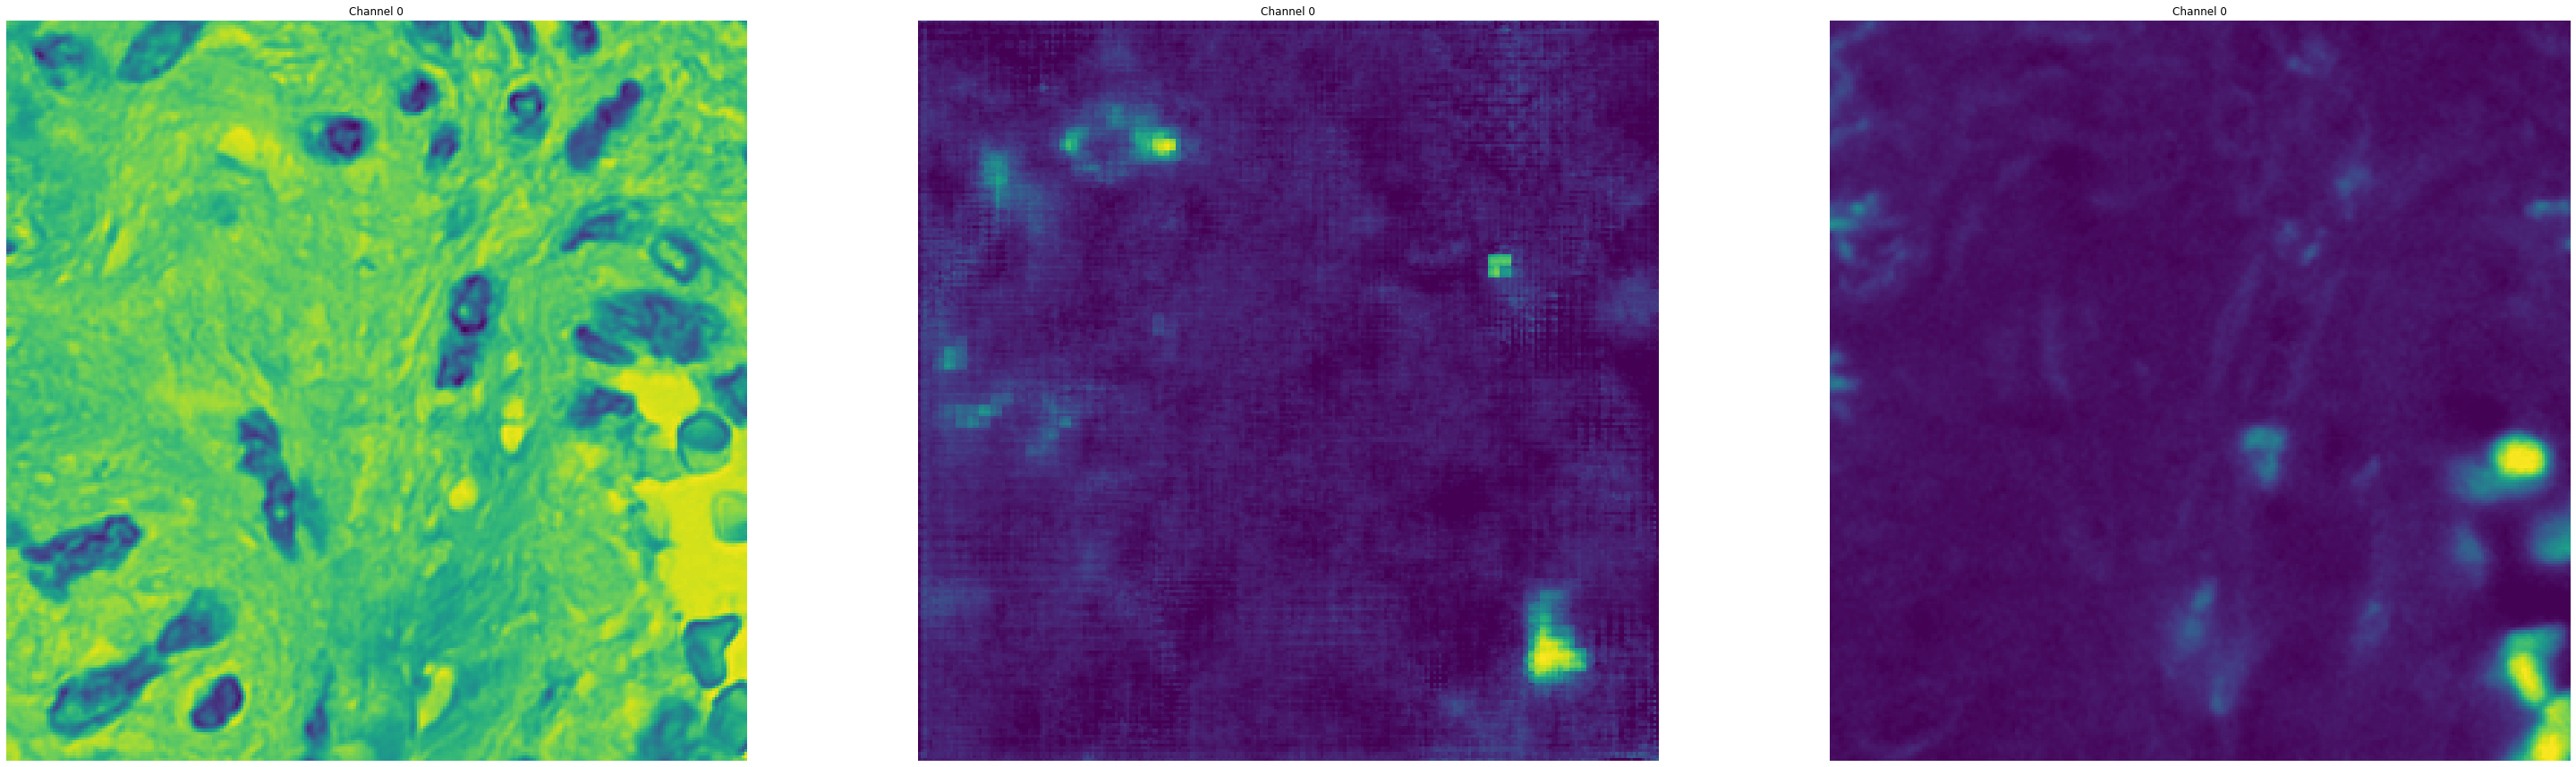

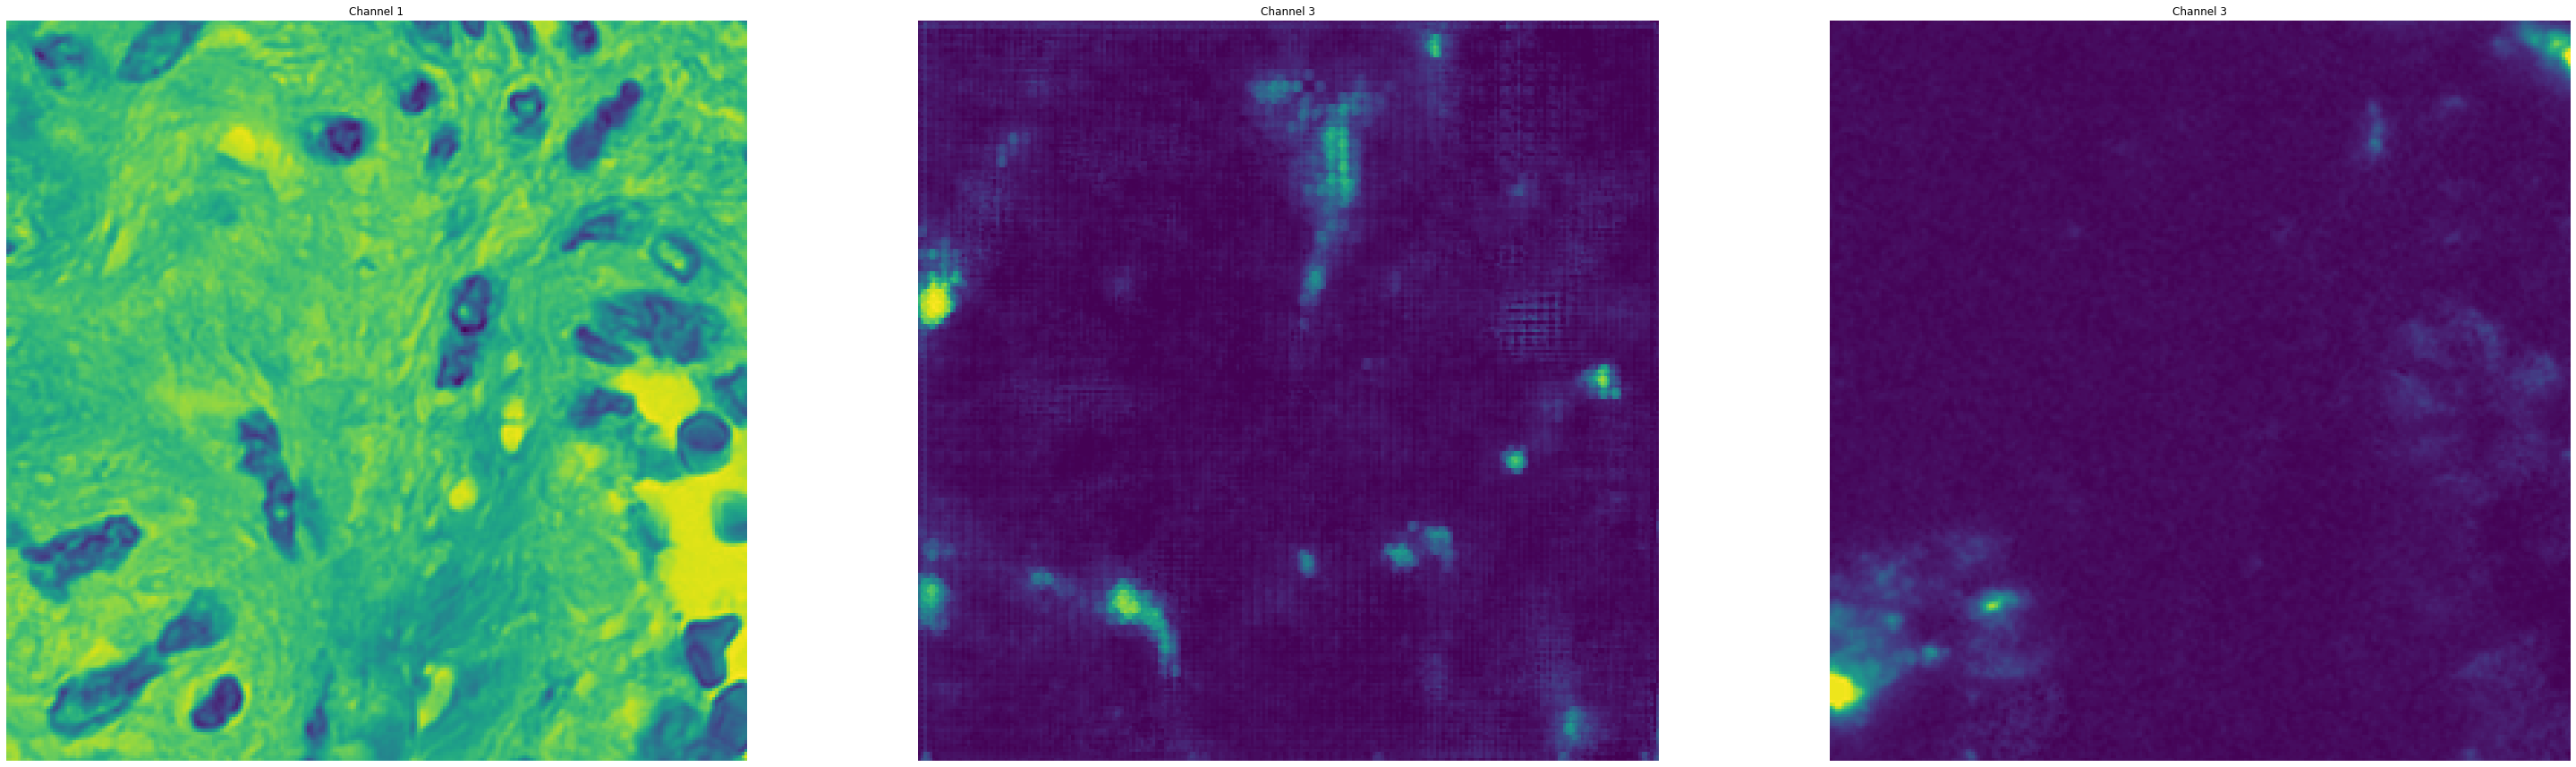

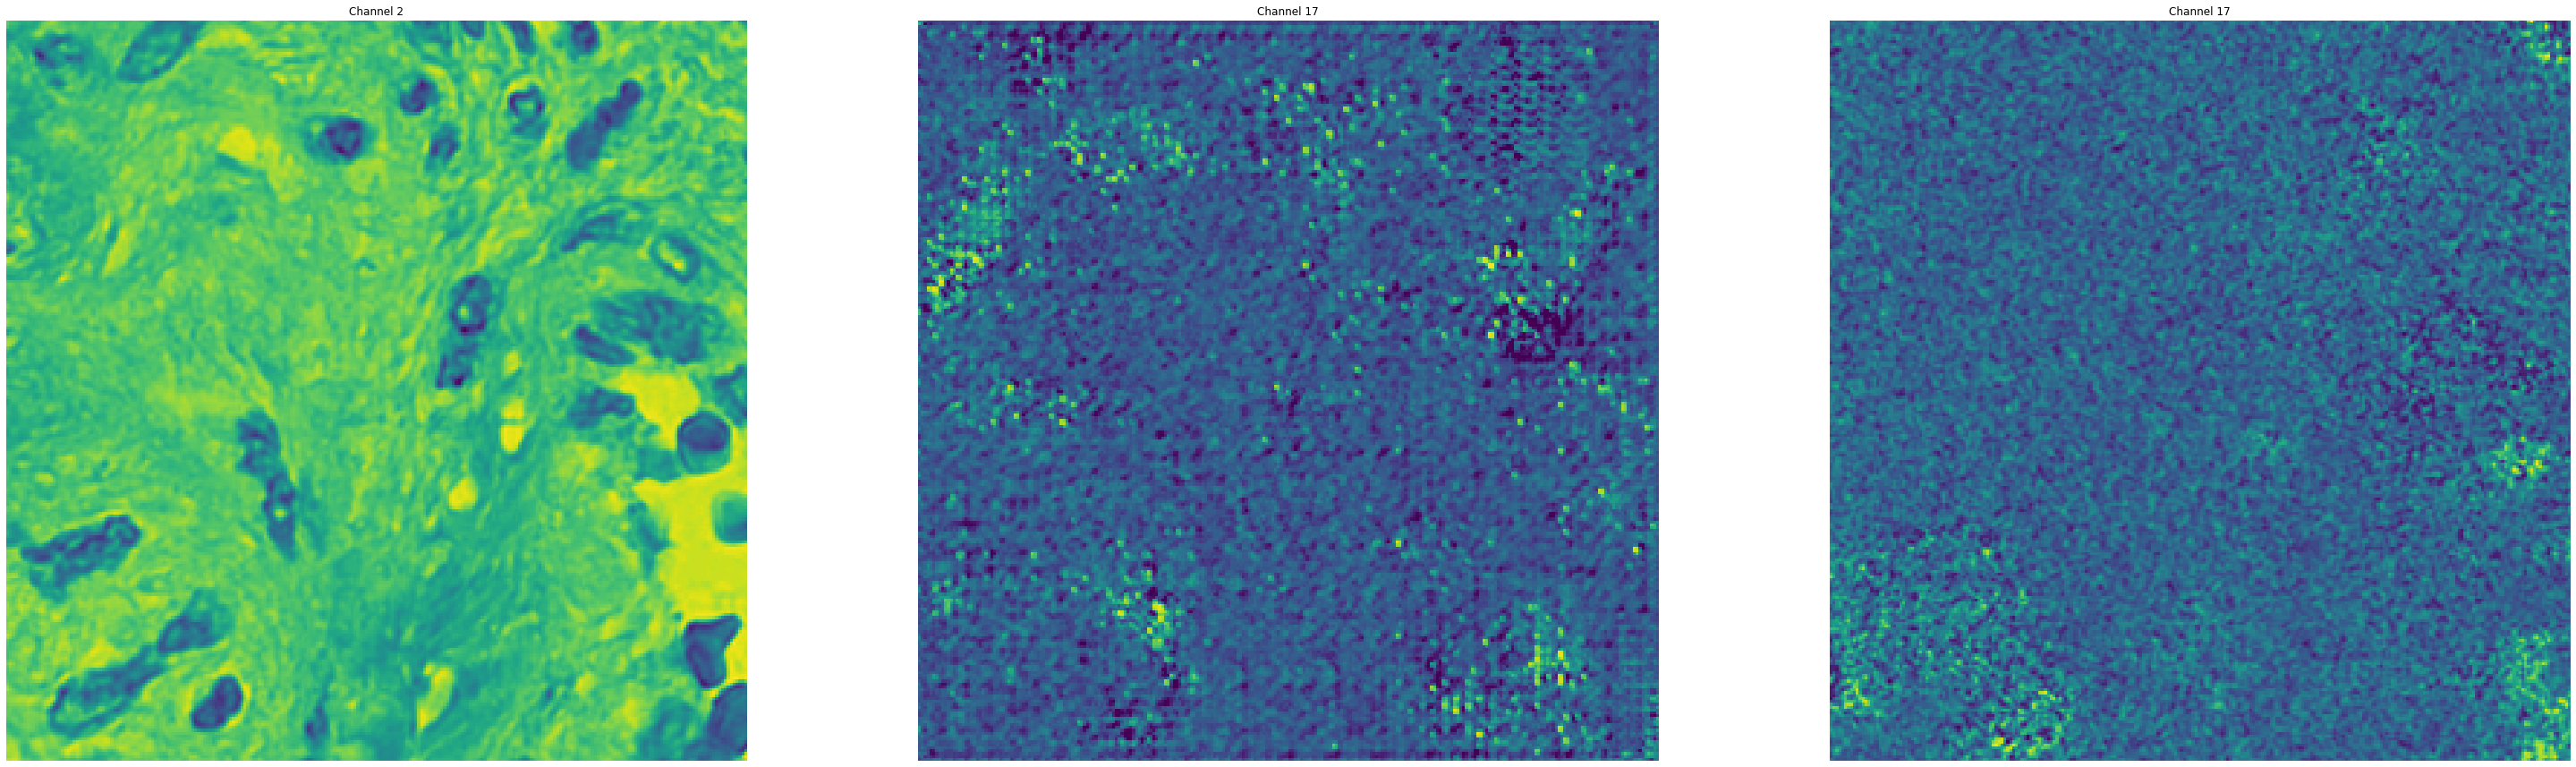

<Figure size 3600x3600 with 0 Axes>

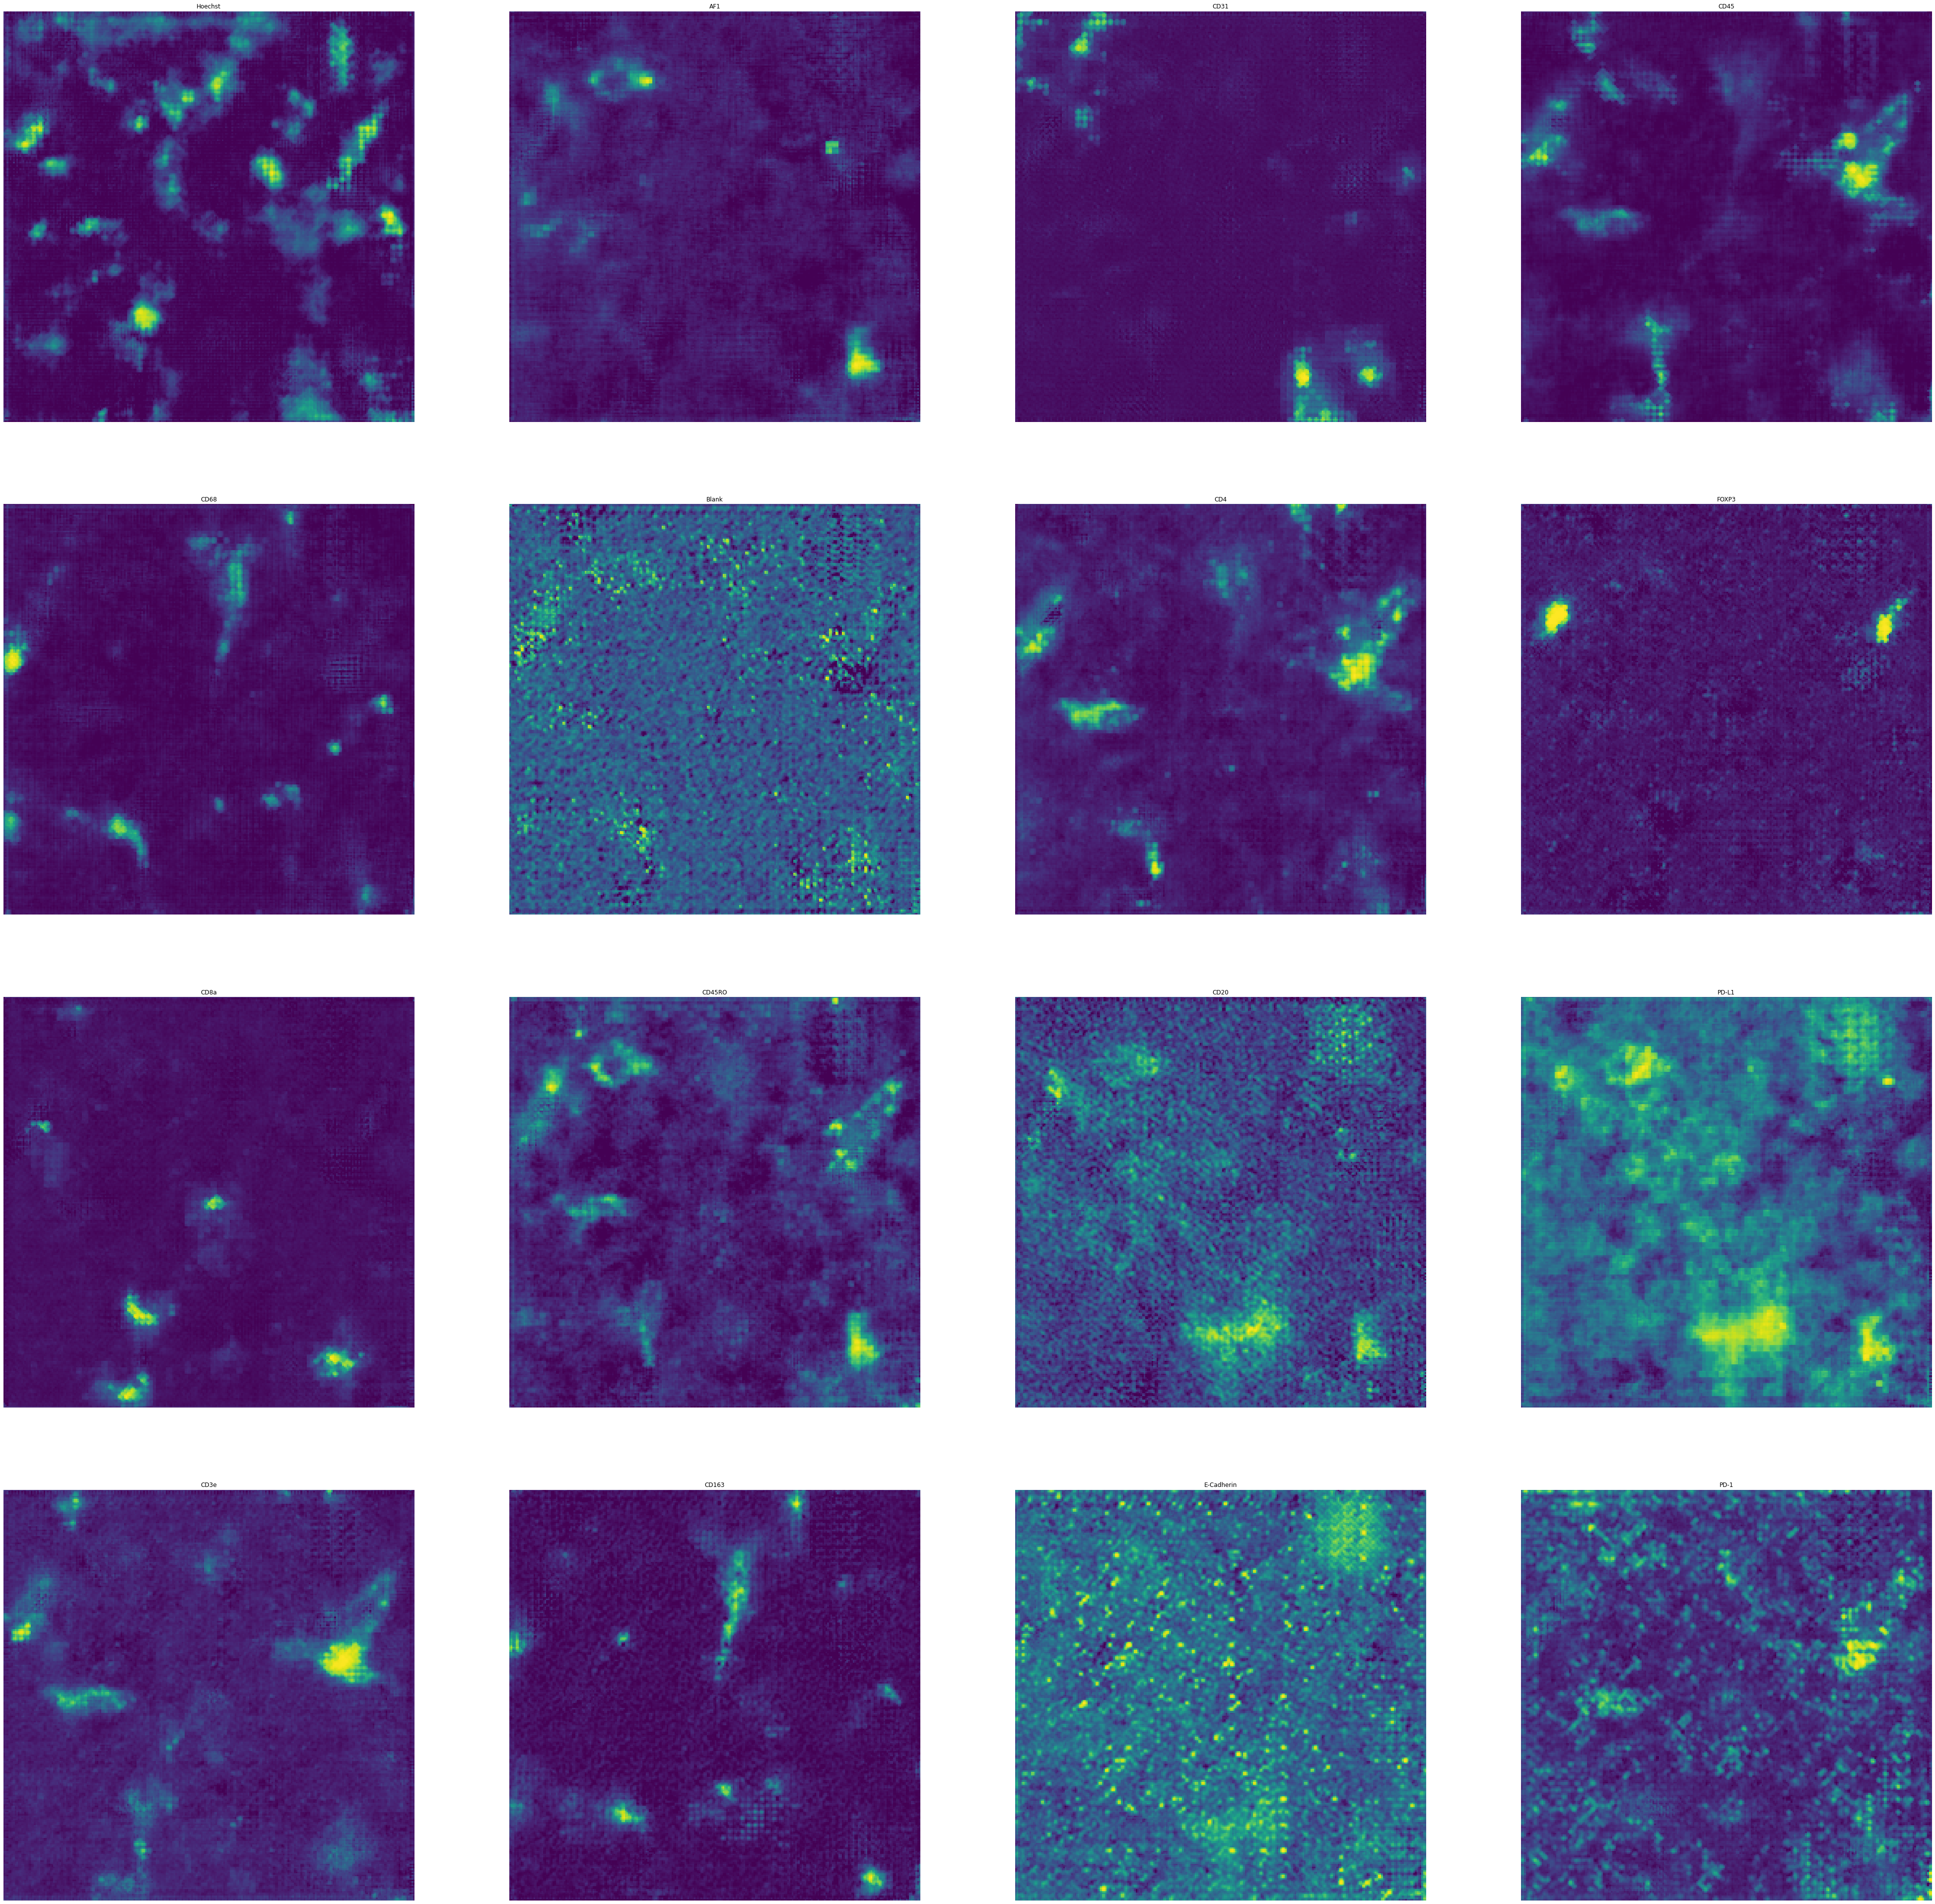

In [153]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import io

import os.path

%matplotlib inline

def plot_imgs(imgs, titles):
    """
    Generate visualization of list of arrays
    :param imgs: list of arrays, each numpy array is an image of size (width, height)
    :param titles: list of titles [string]
    """
    # create figure
    fig = plt.figure(figsize=(70, 70))
    # loop over images
    for i in range(len(imgs)):
        fig.add_subplot(4, 4, i + 1)
        plt.imshow(imgs[i])
        plt.title(str(titles[i]))
        plt.axis("off")
        
def return_list_of_matches(key, elements):
    """
    uses the key (identifier for each generated image) and 
    returns on a list all the elemets on the path that contain that key.
    In general should be Real A, Fake B, Real B
    """
    lista_elementos = []
    for i in elements:
        if key in i:
            lista_elementos.append(i)
    return lista_elementos
SAVER = False

marker = ['Hoechst','AF1','CD31','CD45','CD68','Blank','CD4',
          'FOXP3','CD8a','CD45RO','CD20','PD-L1','CD3e','CD163',
          'E-Cadherin','PD-1','Ki-67','Pan-CK','SMA'
         ]

def plot_results(path,thr):
    idx =0
    for el in os.listdir(path)[:thr]:
        print(el)
        if ".png" in el:
            key = el[:-10]#png
            #key = "_"+matcher+"_"
            #"""
            list_of_images = return_list_of_matches(key, os.listdir(path))
            
            print("Aligned images: ", list_of_images)
            Real_A = io.imread(os.path.join(path, list_of_images[0]))
            Fake_B = io.imread(os.path.join(path, list_of_images[1]))
            Real_B = io.imread(os.path.join(path, list_of_images[2]))
            plot_imgs([Real_A, Fake_B, Real_B], ["real_A", "fake_B", "Real_B"])
            plot_imgs([Fake_B[:,:,0], Fake_B[:,:,1], Fake_B[:,:,2]], ["ch_0", "ch_3", "ch_17"])
            plot_imgs([Real_B[:,:,0], Real_B[:,:,1], Real_B[:,:,2]], ["Channel 0", "Channel 3", "Channel 17"])
            print(f"Range for HE]-> [{Real_A.min(), Real_A.max()}]")
            print(f"Range for IF]-> [{Real_B.min(), Real_B.max()}]")
            print(f"Range for Generated IF]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF (stack)]-> [{Fake_B.min(), Fake_B.max()}]")
            print(f"Range for Generated IF Channel 0]-> [{Fake_B[:,:,0].min(), Fake_B[:,:,0].max()}]")
            print(f"Range for Generated IF Channel 3]-> [{Fake_B[:,:,1].min(), Fake_B[:,:,1].max()}]")
            print(f"Range for Generated IF Channel 17]-> [{Fake_B[:,:,2].min(), Fake_B[:,:,2].max()}]")
            
            print(f"Range for Real_IF  Channel 0]-> [{Real_B[:,:,0].min(), Real_B[:,:,0].max()}]")
            print(f"Range for Real_IF  Channel 3]-> [{Real_B[:,:,1].min(), Real_B[:,:,1].max()}]")
            print(f"Range for Real_IF  Channel 17]-> [{Real_B[:,:,2].min(), Real_B[:,:,2].max()}]")
            #"""
            idx+=1
            if idx ==thr:
                break
        if ".tiff" in el:
            key = el[:-12]#png
            #print(key)
            list_of_images = return_list_of_matches(key, os.listdir(path))
            if len(list_of_images)==3:
                print("Aligned images: ", list_of_images)
                Real_A = io.imread(os.path.join(path, list_of_images[0]))
                Fake_B = io.imread(os.path.join(path, list_of_images[1]))
                Real_B = io.imread(os.path.join(path, list_of_images[2]))
                print(Real_A.shape, Fake_B.shape, Real_B.shape)
                #plot_imgs([Real_A, Fake_B[:,:,[0,3,17]], Real_B[:,:,:3]], ["Real H&E", "Generated IF", "Real IF"])
                ch_1 = 1
                ch_2 = 4
                ch_3 = 5
                plot_imgs([Real_A, Fake_B[:,:,[ch_1, ch_2, ch_3]], Real_B[:,:,[ch_1, ch_2, ch_3]]], ["Real H&E", "Generated IF", "Real IF"])

                plot_imgs([Real_A[:,:,0], Fake_B[:,:,ch_1], Real_B[:,:,ch_1]], ["Channel 0", "Channel 0", "Channel 0"])
                plot_imgs([Real_A[:,:,1], Fake_B[:,:,ch_2], Real_B[:,:,ch_2]], ["Channel 1", "Channel 3", "Channel 3"])
                plot_imgs([Real_A[:,:,2], Fake_B[:,:,ch_3], Real_B[:,:,ch_3]], ["Channel 2", "Channel 17", "Channel 17"])
                print(f"Range for HE]-> [{Real_A.min(), Real_A.max()}]")
                print(f"Range for IF]-> [{Real_B.min(), Real_B.max()}]")
                print(f"Range for Generated IF]-> [{Fake_B.min(), Fake_B.max()}]")
                print(f"Range for Generated IF (stack)]-> [{Fake_B.min(), Fake_B.max()}]")
                print(f"Range for Generated IF Channel 0]-> [{Fake_B[:,:,ch_1].min(), Fake_B[:,:,ch_1].max()}]")
                print(f"Range for Generated IF Channel 3]-> [{Fake_B[:,:,ch_2].min(), Fake_B[:,:,ch_2].max()}]")
                print(f"Range for Generated IF Channel 17]-> [{Fake_B[:,:,ch_3].min(), Fake_B[:,:,ch_3].max()}]")

                print(f"Range for Real_IF  Channel 0]-> [{Real_B[:,:,ch_1].min(), Real_B[:,:,ch_1].max()}]")
                print(f"Range for Real_IF  Channel 3]-> [{Real_B[:,:,ch_2].min(), Real_B[:,:,ch_2].max()}]")
                print(f"Range for Real_IF  Channel 17]-> [{Real_B[:,:,ch_3].min(), Real_B[:,:,ch_3].max()}]")
                #"""
                fig_N_ch = plt.figure(figsize=(50, 50))
                # loop over images
                num_channels = 16# target.shape[2]
                list_targets = [Fake_B[:,:,ch] for ch in range(num_channels)]
                m = marker[:num_channels] # select equal number of channels to visualize
                plot_imgs(list_targets, m)
                #fig_N_ch.savefig(os.path.join(save_dir, f'data_{i}.pdf'))
                #"""
                idx+=1
                if idx == thr:
                    break

plot_results(path_results,1)

### Re-adapting **FID Pytorch** implementation from [Seitzer](https://github.com/mseitzer/pytorch-fid)

Adapted version applied for pytorch-CycleGAN-and-pix2pix predictions. The difference relies mainly on how files are stored and read. pytorch-CycleGAN-and-pix2pix stores files on the same file with different names, here the adaptation takes the same logic from Seitzer, but inputting files with the correct format in `compute_statistics_of_path_improved`

#### Re-implementation of `inception.py`

In [154]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

try:
    from torchvision.models.utils import load_state_dict_from_url
except ImportError:
    from torch.utils.model_zoo import load_url as load_state_dict_from_url

# Inception weights ported to Pytorch from
# http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz
FID_WEIGHTS_URL = 'https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth'  # noqa: E501


class InceptionV3(nn.Module):
    """Pretrained InceptionV3 network returning feature maps"""

    # Index of default block of inception to return,
    # corresponds to output of final average pooling
    DEFAULT_BLOCK_INDEX = 3

    # Maps feature dimensionality to their output blocks indices
    BLOCK_INDEX_BY_DIM = {
        64: 0,   # First max pooling features
        192: 1,  # Second max pooling featurs
        768: 2,  # Pre-aux classifier features
        2048: 3  # Final average pooling features
    }

    def __init__(self,
                 output_blocks=(DEFAULT_BLOCK_INDEX,),
                 resize_input=True,
                 normalize_input=True,
                 requires_grad=False,
                 use_fid_inception=True):
        """Build pretrained InceptionV3
        Parameters
        ----------
        output_blocks : list of int
            Indices of blocks to return features of. Possible values are:
                - 0: corresponds to output of first max pooling
                - 1: corresponds to output of second max pooling
                - 2: corresponds to output which is fed to aux classifier
                - 3: corresponds to output of final average pooling
        resize_input : bool
            If true, bilinearly resizes input to width and height 299 before
            feeding input to model. As the network without fully connected
            layers is fully convolutional, it should be able to handle inputs
            of arbitrary size, so resizing might not be strictly needed
        normalize_input : bool
            If true, scales the input from range (0, 1) to the range the
            pretrained Inception network expects, namely (-1, 1)
        requires_grad : bool
            If true, parameters of the model require gradients. Possibly useful
            for finetuning the network
        use_fid_inception : bool
            If true, uses the pretrained Inception model used in Tensorflow's
            FID implementation. If false, uses the pretrained Inception model
            available in torchvision. The FID Inception model has different
            weights and a slightly different structure from torchvision's
            Inception model. If you want to compute FID scores, you are
            strongly advised to set this parameter to true to get comparable
            results.
        """
        super(InceptionV3, self).__init__()

        self.resize_input = resize_input
        self.normalize_input = normalize_input
        self.output_blocks = sorted(output_blocks)
        self.last_needed_block = max(output_blocks)

        assert self.last_needed_block <= 3, \
            'Last possible output block index is 3'

        self.blocks = nn.ModuleList()

        if use_fid_inception:
            inception = fid_inception_v3()
        else:
            inception = _inception_v3(pretrained=True)

        # Block 0: input to maxpool1
        block0 = [
            inception.Conv2d_1a_3x3,
            inception.Conv2d_2a_3x3,
            inception.Conv2d_2b_3x3,
            nn.MaxPool2d(kernel_size=3, stride=2)
        ]
        self.blocks.append(nn.Sequential(*block0))

        # Block 1: maxpool1 to maxpool2
        if self.last_needed_block >= 1:
            block1 = [
                inception.Conv2d_3b_1x1,
                inception.Conv2d_4a_3x3,
                nn.MaxPool2d(kernel_size=3, stride=2)
            ]
            self.blocks.append(nn.Sequential(*block1))

        # Block 2: maxpool2 to aux classifier
        if self.last_needed_block >= 2:
            block2 = [
                inception.Mixed_5b,
                inception.Mixed_5c,
                inception.Mixed_5d,
                inception.Mixed_6a,
                inception.Mixed_6b,
                inception.Mixed_6c,
                inception.Mixed_6d,
                inception.Mixed_6e,
            ]
            self.blocks.append(nn.Sequential(*block2))

        # Block 3: aux classifier to final avgpool
        if self.last_needed_block >= 3:
            block3 = [
                inception.Mixed_7a,
                inception.Mixed_7b,
                inception.Mixed_7c,
                nn.AdaptiveAvgPool2d(output_size=(1, 1))
            ]
            self.blocks.append(nn.Sequential(*block3))

        for param in self.parameters():
            param.requires_grad = requires_grad

    def forward(self, inp):
        """Get Inception feature maps
        Parameters
        ----------
        inp : torch.autograd.Variable
            Input tensor of shape Bx3xHxW. Values are expected to be in
            range (0, 1)
        Returns
        -------
        List of torch.autograd.Variable, corresponding to the selected output
        block, sorted ascending by index
        """
        outp = []
        x = inp

        if self.resize_input:
            x = F.interpolate(x,
                              size=(299, 299),
                              mode='bilinear',
                              align_corners=False)

        if self.normalize_input:
            x = 2 * x - 1  # Scale from range (0, 1) to range (-1, 1)

        for idx, block in enumerate(self.blocks):
            x = block(x)
            if idx in self.output_blocks:
                outp.append(x)

            if idx == self.last_needed_block:
                break

        return outp


def _inception_v3(*args, **kwargs):
    """Wraps `torchvision.models.inception_v3`
    Skips default weight inititialization if supported by torchvision version.
    See https://github.com/mseitzer/pytorch-fid/issues/28.
    """
    try:
        version = tuple(map(int, torchvision.__version__.split('.')[:2]))
    except ValueError:
        # Just a caution against weird version strings
        version = (0,)

    if version >= (0, 6):
        kwargs['init_weights'] = False

    return torchvision.models.inception_v3(*args, **kwargs)


def fid_inception_v3():
    """Build pretrained Inception model for FID computation
    The Inception model for FID computation uses a different set of weights
    and has a slightly different structure than torchvision's Inception.
    This method first constructs torchvision's Inception and then patches the
    necessary parts that are different in the FID Inception model.
    """
    inception = _inception_v3(num_classes=1008,
                              aux_logits=False,
                              pretrained=False)
    inception.Mixed_5b = FIDInceptionA(192, pool_features=32)
    inception.Mixed_5c = FIDInceptionA(256, pool_features=64)
    inception.Mixed_5d = FIDInceptionA(288, pool_features=64)
    inception.Mixed_6b = FIDInceptionC(768, channels_7x7=128)
    inception.Mixed_6c = FIDInceptionC(768, channels_7x7=160)
    inception.Mixed_6d = FIDInceptionC(768, channels_7x7=160)
    inception.Mixed_6e = FIDInceptionC(768, channels_7x7=192)
    inception.Mixed_7b = FIDInceptionE_1(1280)
    inception.Mixed_7c = FIDInceptionE_2(2048)

    state_dict = load_state_dict_from_url(FID_WEIGHTS_URL, progress=True)
    inception.load_state_dict(state_dict)
    return inception


class FIDInceptionA(torchvision.models.inception.InceptionA):
    """InceptionA block patched for FID computation"""
    def __init__(self, in_channels, pool_features):
        super(FIDInceptionA, self).__init__(in_channels, pool_features)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        # Patch: Tensorflow's average pool does not use the padded zero's in
        # its average calculation
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1,
                                   count_include_pad=False)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class FIDInceptionC(torchvision.models.inception.InceptionC):
    """InceptionC block patched for FID computation"""
    def __init__(self, in_channels, channels_7x7):
        super(FIDInceptionC, self).__init__(in_channels, channels_7x7)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch7x7 = self.branch7x7_1(x)
        branch7x7 = self.branch7x7_2(branch7x7)
        branch7x7 = self.branch7x7_3(branch7x7)

        branch7x7dbl = self.branch7x7dbl_1(x)
        branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)

        # Patch: Tensorflow's average pool does not use the padded zero's in
        # its average calculation
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1,
                                   count_include_pad=False)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch7x7, branch7x7dbl, branch_pool]
        return torch.cat(outputs, 1)


class FIDInceptionE_1(torchvision.models.inception.InceptionE):
    """First InceptionE block patched for FID computation"""
    def __init__(self, in_channels):
        super(FIDInceptionE_1, self).__init__(in_channels)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)

        # Patch: Tensorflow's average pool does not use the padded zero's in
        # its average calculation
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1,
                                   count_include_pad=False)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class FIDInceptionE_2(torchvision.models.inception.InceptionE):
    """Second InceptionE block patched for FID computation"""
    def __init__(self, in_channels):
        super(FIDInceptionE_2, self).__init__(in_channels)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)

        # Patch: The FID Inception model uses max pooling instead of average
        # pooling. This is likely an error in this specific Inception
        # implementation, as other Inception models use average pooling here
        # (which matches the description in the paper).
        branch_pool = F.max_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)
print("loaded")

loaded


#### Re-implementation of `fid_score.py` file

In [155]:
import torchvision.transforms as TF
try:
    from tqdm import tqdm
except ImportError:
    # If tqdm is not available, provide a mock version of it
    def tqdm(x):
        return x

import os
import pathlib
from argparse import ArgumentDefaultsHelpFormatter, ArgumentParser

import numpy as np
import torch
import torchvision.transforms as TF
from PIL import Image
from scipy import linalg
from torch.nn.functional import adaptive_avg_pool2d

IMAGE_EXTENSIONS = {'bmp', 'jpg', 'jpeg', 'pgm', 'png', 'ppm',
                    'tif', 'tiff', 'webp'}
    

class ImagePathDataset(torch.utils.data.Dataset):
    def __init__(self, files, transforms=None):
        self.files = files
        self.transforms = transforms

    def __len__(self):
        return len(self.files)

    def __getitem__(self, i):
        path = self.files[i]
        img = Image.open(path).convert('RGB')
        if self.transforms is not None:
            img = self.transforms(img)
        return img

def calculate_activation_statistics(files, model, batch_size=50, dims=2048,
                                    device='cpu', num_workers=1):
    """Calculation of the statistics used by the FID.
    Params:
    -- files       : List of image files paths
    -- model       : Instance of inception model
    -- batch_size  : The images numpy array is split into batches with
                     batch size batch_size. A reasonable batch size
                     depends on the hardware.
    -- dims        : Dimensionality of features returned by Inception
    -- device      : Device to run calculations
    -- num_workers : Number of parallel dataloader workers
    Returns:
    -- mu    : The mean over samples of the activations of the pool_3 layer of
               the inception model.
    -- sigma : The covariance matrix of the activations of the pool_3 layer of
               the inception model.
    """
    act = get_activations(files, model, batch_size, dims, device, num_workers)
    mu = np.mean(act, axis=0)
    sigma = np.cov(act, rowvar=False)
    return mu, sigma

def get_activations(files, model, batch_size=50, dims=2048, device='cpu',
                    num_workers=1):
    """Calculates the activations of the pool_3 layer for all images.
    Params:
    -- files       : List of image files paths
    -- model       : Instance of inception model
    -- batch_size  : Batch size of images for the model to process at once.
                     Make sure that the number of samples is a multiple of
                     the batch size, otherwise some samples are ignored. This
                     behavior is retained to match the original FID score
                     implementation.
    -- dims        : Dimensionality of features returned by Inception
    -- device      : Device to run calculations
    -- num_workers : Number of parallel dataloader workers
    Returns:
    -- A numpy array of dimension (num images, dims) that contains the
       activations of the given tensor when feeding inception with the
       query tensor.
    """
    model.eval()

    if batch_size > len(files):
        print(('Warning: batch size is bigger than the data size. '
               'Setting batch size to data size'))
        batch_size = len(files)

    dataset = ImagePathDataset(files, transforms=TF.ToTensor())
    dataloader = torch.utils.data.DataLoader(dataset,
                                             batch_size=batch_size,
                                             shuffle=False,
                                             drop_last=False,
                                             num_workers=num_workers)

    pred_arr = np.empty((len(files), dims))

    start_idx = 0

    for batch in tqdm(dataloader):
        batch = batch.to(device)

        with torch.no_grad():
            pred = model(batch)[0]

        # If model output is not scalar, apply global spatial average pooling.
        # This happens if you choose a dimensionality not equal 2048.
        if pred.size(2) != 1 or pred.size(3) != 1:
            pred = adaptive_avg_pool2d(pred, output_size=(1, 1))

        pred = pred.squeeze(3).squeeze(2).cpu().numpy()

        pred_arr[start_idx:start_idx + pred.shape[0]] = pred

        start_idx = start_idx + pred.shape[0]

    return pred_arr

#### Parameters

In [156]:
dims = 2048
device='cpu'
batch_size = 1
num_workers = 1
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]
model = InceptionV3([block_idx]).to(device)

In [157]:
def compute_statistics_of_path_improved(files, model, batch_size, dims, device,
                               num_workers=1):
        import glob
        #if path.endswith('.npz'):
        #    with np.load(path) as f:
        #        m, s = f['mu'][:], f['sigma'][:]
        #else:
        #path = pathlib.Path(path)
        #files = sorted([file for ext in IMAGE_EXTENSIONS for file in path.glob('*.{}'.format(ext))]) 
        m, s = calculate_activation_statistics(files, model, batch_size,
                                               dims, device, num_workers)
        return m,s

In [158]:
# Now we collect the results we wanna compare, so fake_B and real_B
A = []
B = []
for i in os.listdir(path_results):
    if "fake_B" in i:
        A.append(os.path.join(path_results, i))
    if "real_B" in i:
        B.append(os.path.join(path_results, i))
assert len(A)==len(B), "testing incomplete"
print(len(A))

50


In [159]:
m1, s1 = compute_statistics_of_path_improved(A, model, batch_size,
                                        dims, device, num_workers)
m2, s2 = compute_statistics_of_path_improved(B, model, batch_size,
                                        dims, device, num_workers)

100%|██████████| 50/50 [00:27<00:00,  1.85it/s]


In [160]:
def calculate_frechet_distance(mu1, sigma1, mu2, sigma2, eps=1e-6):
    """Numpy implementation of the Frechet Distance.
    The Frechet distance between two multivariate Gaussians X_1 ~ N(mu_1, C_1)
    and X_2 ~ N(mu_2, C_2) is
            d^2 = ||mu_1 - mu_2||^2 + Tr(C_1 + C_2 - 2*sqrt(C_1*C_2)).
    Stable version by Dougal J. Sutherland.
    Params:
    -- mu1   : Numpy array containing the activations of a layer of the
               inception net (like returned by the function 'get_predictions')
               for generated samples.
    -- mu2   : The sample mean over activations, precalculated on an
               representative data set.
    -- sigma1: The covariance matrix over activations for generated samples.
    -- sigma2: The covariance matrix over activations, precalculated on an
               representative data set.
    Returns:
    --   : The Frechet Distance.
    """

    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    assert mu1.shape == mu2.shape, \
        'Training and test mean vectors have different lengths'
    assert sigma1.shape == sigma2.shape, \
        'Training and test covariances have different dimensions'

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return mu1, mu2, sigma1, sigma2, (diff.dot(diff) + np.trace(sigma1)
            + np.trace(sigma2) - 2 * tr_covmean)


mu1, mu2, sigma1, sigma2,fid_value = calculate_frechet_distance(m1, s1, m2, s2)

mu1 = torch.from_numpy(mu1)
mu2 = torch.from_numpy(mu2)
sigma1 = torch.from_numpy(sigma1)
sigma2 = torch.from_numpy(sigma2)


### Results

In [161]:
print(fid_value)

76.13612762603697


In [162]:
print(mu1.shape, sigma1.shape)

torch.Size([2048]) torch.Size([2048, 2048])


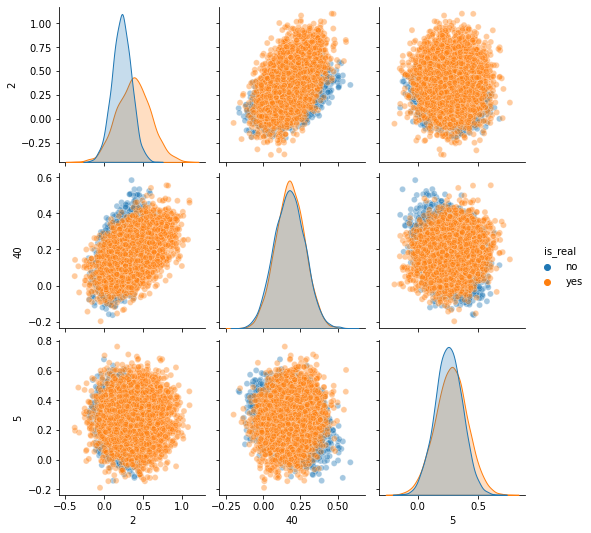

In [172]:
from torch.distributions import MultivariateNormal
import seaborn as sns # This is for visualization

indices = [2, 40, 5]
fake_dist = MultivariateNormal(mu1[indices], sigma1[indices][:, indices])
fake_samples = fake_dist.sample((5000,))
real_dist = MultivariateNormal(mu2[indices], sigma2[indices][:, indices])
real_samples = real_dist.sample((5000,))

import pandas as pd
df_fake = pd.DataFrame(fake_samples.numpy(), columns=indices)
df_real = pd.DataFrame(real_samples.numpy(), columns=indices)
df_fake["is_real"] = "no"
df_real["is_real"] = "yes"
df = pd.concat([df_fake, df_real]).reset_index(drop = True)
sns.pairplot(df, plot_kws={'alpha': 0.4}, hue='is_real')

In [164]:
fake_samples.shape


torch.Size([5000, 3])

In [165]:
df.groupby(by = "is_real").count()

2     4     5
is_real                  
no       5000  5000  5000
yes      5000  5000  5000

before: torch.Size([5000, 3]), After: torch.Size([10000, 3])


/n/home09/scajasordonez/anaconda3/envs/sebasmos/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


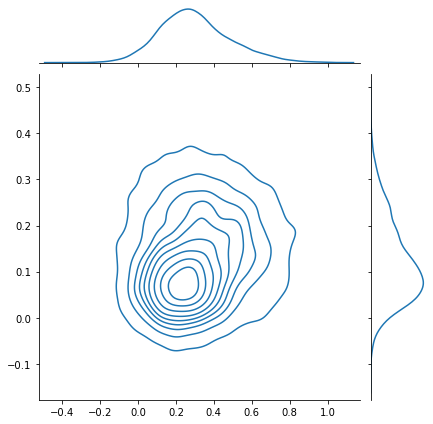

In [166]:
full_cat = torch.cat([fake_samples, real_samples])
print(f"before: {fake_samples.shape}, After: {full_cat.shape}")
res = sns.jointplot(full_cat[:, 0], full_cat[:, 1], kind="kde")
plt.show()

In [170]:
from sklearn.metrics import mean_squared_error

MSE = []
for fake, real in zip(A,B):
    fake_img = io.imread(fake)
    real_img = io.imread(real)
    assert fake_img.shape == real_img.shape, "real & fake should have same dimensionality!"
    loss = mean_squared_error(fake_img.flatten(), real_img.flatten())
    MSE.append(loss)
print(f"MSE: {np.array(MSE).mean()}")

MSE: 105.05416351318361


In [171]:
# https://stackoverflow.com/questions/16774849/mean-squared-error-in-numpy
MSE = []
for fake, real in zip(A,B):
    fake_img = io.imread(fake)
    real_img = io.imread(real)
    assert fake_img.shape == real_img.shape, "real & fake should have same dimensionality!"
    loss =  np.square(fake_img - real_img).mean()
    MSE.append(loss)
print(f"MSE: {np.array(MSE).mean()}")

MSE: 105.05416351318361


In [169]:
MSE

[107.77049496299342,
 104.1323675858347,
 112.30012913754112,
 106.54052172209087,
 106.38882205360814,
 102.08763363486842,
 105.3922223542866,
 104.32137017501027,
 104.21614476254112,
 103.39787934955798,
 106.69547311883224,
 105.61076997455798,
 106.74223327636719,
 102.17996858295642,
 107.30926593981292,
 105.83522033691406,
 101.94112356085526,
 103.14539297003495,
 105.21377242238898,
 104.1029197291324,
 105.42733122173108,
 107.4803964715255,
 107.77306887978001,
 107.62416879754318,
 104.066600598787,
 101.85198733681126,
 109.00114681846217,
 106.40750041760896,
 104.52775172183388,
 106.66033293071546,
 105.2317328202097,
 102.29292297363281,
 103.70071411132812,
 103.54976453279194,
 104.94859876130757,
 101.7465924714741,
 105.95826881810238,
 106.02982209858142,
 105.15985749897204,
 104.81094842208059,
 104.96332429584704,
 107.39494002492805,
 100.15846493369655,
 104.75189369603207,
 108.64753803453948,
 103.84565895482113,
 107.05194653962788,
 101.19077019942434,
